

1.   Initialize Random Seed
2.   Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec








In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
x=int(input('enter roll number:'))
np.random.seed(x)
data=np.random.randint(1000,5001,size=(12,4))
print(data)
df=pd.DataFrame(data.reshape(12,4))
df.columns=['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
df.index=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
print(df)

enter roll number:5
[[3915 3254 2725 4046]
 [4190 2424 3121 2032]
 [1740 4815 2982 3459]
 [3672 3718 4792 4591]
 [1204 4983 4185 2461]
 [4152 3075 2068 1205]
 [4787 4137 4503 4614]
 [3004 4158 4709 3194]
 [2278 1377 4721 2386]
 [1041 2470 2921 3258]
 [1103 4216 1974 3053]
 [4898 3816 3000 1900]]
       Electronics  Clothing  Home & Kitchen  Sports
Jan           3915      3254            2725    4046
Feb           4190      2424            3121    2032
March         1740      4815            2982    3459
April         3672      3718            4792    4591
May           1204      4983            4185    2461
June          4152      3075            2068    1205
July          4787      4137            4503    4614
Aug           3004      4158            4709    3194
Sep           2278      1377            4721    2386
Oct           1041      2470            2921    3258
Nov           1103      4216            1974    3053
Dec           4898      3816            3000    1900


Display the first 5 rows and summary statistics of the DataFrame.


In [39]:
print(df.head())

       Electronics  Clothing  Home & Kitchen  Sports
Jan           3915      3254            2725    4046
Feb           4190      2424            3121    2032
March         1740      4815            2982    3459
April         3672      3718            4792    4591
May           1204      4983            4185    2461


In [40]:
print(df.describe())

       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2998.666667  3536.916667     3475.083333  3016.583333
std    1464.692666  1060.783369     1047.364698  1069.466686
min    1041.000000  1377.000000     1974.000000  1205.000000
25%    1606.000000  2923.750000     2872.000000  2297.500000
50%    3338.000000  3767.000000     3060.500000  3123.500000
75%    4161.500000  4172.500000     4554.500000  3605.750000
max    4898.000000  4983.000000     4792.000000  4614.000000


Calculate the total sales per category and total sales per month.

In [41]:
row_sum=df.sum(axis=1)
print(row_sum)

Jan      13940
Feb      11767
March    12996
April    16773
May      12833
June     10500
July     18041
Aug      15065
Sep      10762
Oct       9690
Nov      10346
Dec      13614
dtype: int64


In [25]:
col_sum=df.sum(axis=0)
print(col_sum)

month_number      JanFebMarchAprilMayJuneJulyAugSepOctNovDec
Electronics                                            35984
Clothing                                               42443
Home & Kitchen                                         41701
Sports                                                 36199
dtype: object


Calculate the average sales growth between consecuƟve months for each category.

In [43]:
growth=df.diff()
print(growth)
avg=growth.mean()
print(avg)

       Electronics  Clothing  Home & Kitchen  Sports
Jan            NaN       NaN             NaN     NaN
Feb          275.0    -830.0           396.0 -2014.0
March      -2450.0    2391.0          -139.0  1427.0
April       1932.0   -1097.0          1810.0  1132.0
May        -2468.0    1265.0          -607.0 -2130.0
June        2948.0   -1908.0         -2117.0 -1256.0
July         635.0    1062.0          2435.0  3409.0
Aug        -1783.0      21.0           206.0 -1420.0
Sep         -726.0   -2781.0            12.0  -808.0
Oct        -1237.0    1093.0         -1800.0   872.0
Nov           62.0    1746.0          -947.0  -205.0
Dec         3795.0    -400.0          1026.0 -1153.0
Electronics        89.363636
Clothing           51.090909
Home & Kitchen     25.000000
Sports           -195.090909
dtype: float64


Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.

In [34]:
df['total sales']=row_sum
df['growth rate']=df['total sales'].pct_change()*100

<ipython-input-34-9fa818dc9bcc>:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['growth rate']=df['total sales'].pct_change()*100


In [30]:
print(df)

   month_number  Electronics  Clothing  Home & Kitchen  Sports  total sales  \
0           Jan         3915   2765.90            2725    4046          NaN   
1           Feb         4190   2060.40            3121    2032          NaN   
2         March         1740   4092.75            2982    3459          NaN   
3         April         3672   3160.30            4792    4591          NaN   
4           May         1204   4235.55            4185    2461          NaN   
5          June         4152   2613.75            2068    1205          NaN   
6          July         4787   3516.45            4503    4614          NaN   
7           Aug         3004   3534.30            4709    3194          NaN   
8           Sep         2278   1170.45            4721    2386          NaN   
9           Oct         1041   2099.50            2921    3258          NaN   
10          Nov         1103   3583.60            1974    3053          NaN   
11          Dec         4898   3243.60            30

Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.

 If odd, apply a 15% discount to the Clothing category.

In [28]:
if (x%2==0):
    df['Electronics']=0.90*df['Electronics']
else:
    df['Clothing']=0.85*df['Clothing']
print(df)

   month_number  Electronics  Clothing  Home & Kitchen  Sports
0           Jan         3915   2765.90            2725    4046
1           Feb         4190   2060.40            3121    2032
2         March         1740   4092.75            2982    3459
3         April         3672   3160.30            4792    4591
4           May         1204   4235.55            4185    2461
5          June         4152   2613.75            2068    1205
6          July         4787   3516.45            4503    4614
7           Aug         3004   3534.30            4709    3194
8           Sep         2278   1170.45            4721    2386
9           Oct         1041   2099.50            2921    3258
10          Nov         1103   3583.60            1974    3053
11          Dec         4898   3243.60            3000    1900


Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category.

<Axes: xlabel='month_number', ylabel='type'>

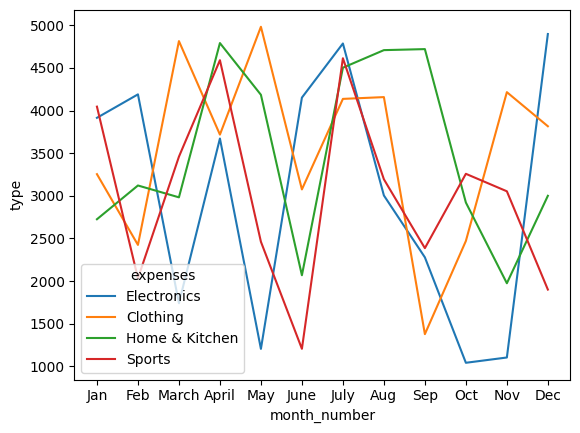

In [44]:
df = df.reset_index().rename(columns={'index': 'month_number'})
sales=df.melt('month_number',['Electronics','Clothing', 'Home & Kitchen', 'Sports'],'expenses','type')
sns.lineplot(x='month_number',hue='expenses',data=sales,y='type')

<ipython-input-47-2dee0a2b4b50>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


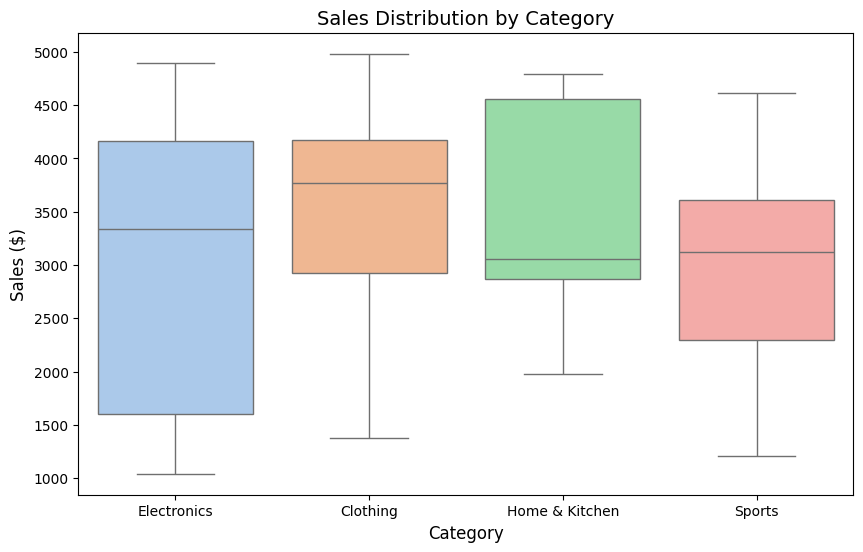

In [47]:
sales_melted = df.reset_index().melt(
    id_vars='index',  # Keep month names
    value_vars=['Electronics', 'Clothing', 'Home & Kitchen', 'Sports'],
    var_name='Category',
    value_name='Sales'
)

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Category',  # This should now be string categories
    y='Sales',     # Numeric sales values
    data=sales_melted,
    palette='pastel'
)

# Add titles and labels
plt.title('Sales Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
i. Find element-wise absolute value

In [52]:
array=np.array([[1,-2,3],[-4,5,6]])
x=np.absolute(array)
print(x)

[[1 2 3]
 [4 5 6]]


ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.

In [57]:
flatten_percentile=np.percentile(array.flatten(),[25,50,75])
print(flatten_percentile)

[-1.25  2.    4.5 ]


In [58]:
col_percentile=np.percentile(array,[25,50,75],axis=0)
print(col_percentile)

[[-2.75 -0.25  3.75]
 [-1.5   1.5   4.5 ]
 [-0.25  3.25  5.25]]


In [59]:
row_percentiles = np.percentile(array, [25, 50, 75], axis=1)
print("\nRow-wise percentiles:\n", row_percentiles)


Row-wise percentiles:
 [[-0.5  0.5]
 [ 1.   5. ]
 [ 2.   5.5]]


iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row

In [60]:
mean=np.mean(array.flatten())
print(mean)

1.5


In [61]:
row_mean=np.mean(array,axis=1)
print(row_mean)

[0.66666667 2.33333333]


In [62]:
col_mean=np.mean(array,axis=0)
print(col_mean)

[-1.5  1.5  4.5]


In [63]:
row_median=np.median(array,axis=1)
print(row_median)

[1. 5.]


In [64]:
col_median=np.median(array,axis=0)
print(col_median)

[-1.5  1.5  4.5]


In [65]:
row_sd=np.std(array,axis=1)
print(row_sd)

[2.05480467 4.49691252]


In [66]:
col_sd=np.std(array,axis=0)
print(col_sd)

[2.5 3.5 1.5]


In [67]:
sd=np.std(array.flatten())
print(sd)

3.593976442141304


In [68]:
median=np.median(array.flatten())
print(median)

2.0


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
i. Find floor, ceiling and truncated value, rounded values

In [72]:
a=np.array([-1.8,-1.6,-0.5,0.5,1.6,1.8,3.0])
print(np.floor(a))
print(np.ceil(a))
print(np.round(a))
print(np.trunc(a))

[-2. -2. -1.  0.  1.  1.  3.]
[-1. -1. -0.  1.  2.  2.  3.]
[-2. -2. -0.  0.  2.  2.  3.]
[-1. -1. -0.  0.  1.  1.  3.]


WAP to swap two elements in a list in Python Using a Temporary Variable.

In [73]:
l=[1,2,3,4,5]
print(l)
temp=l[1]
l[1]=l[2]
l[2]=temp
print(l)

[1, 2, 3, 4, 5]
[1, 3, 2, 4, 5]


Write a Python program to swap two elements in a set by converƟng it to a list first.

In [84]:
my_set={1,2,3,4,5}
print(my_set)
print(type(my_set))
l=list(my_set)
print(l)
print(type(l))
temp=l[1]
l[1]=l[2]
l[2]=temp
print(l)

{1, 2, 3, 4, 5}
<class 'set'>
[1, 2, 3, 4, 5]
<class 'list'>
[1, 3, 2, 4, 5]
